<h1><center>Automobile Price Prediction</center></h1>
<center>A Linear Regression Case Study</center>

In [2124]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

### Importing Basic Libraries

In [2125]:
# Basic Libraries
import pandas as pd                     # Querying library
import numpy as np                      # Numerical computing library
import matplotlib.pyplot as plt         # Visualization library
import seaborn as sns                   # Visualization library

## Task 1: Loading and Inspecting Data

In [2126]:
# Loading data into df_car dataframe
df_car = pd.read_csv('E:/LR/CarPrice_Assignment.csv')

# Let us make a duplicate copy of dataframe for future reference if needed be.
df_car_duplicate = df_car.copy()

### Subtask 1.1: `Basic Inspection` of data element

  1. View the dataframe.  `Syntax: df_car.head()`
  2. Check the dimensions of the dataframe.  `Syntax: df_car.shape`
  3. Understand the data types, no of non-null data to get an initial look at data attributes.  `Syntax: df_car.info()`
  4. Column listing to understand the metadata information of the data. `Syntax: df_car.columns`
  5. Descriptive statistics to understand the primary spread of the data.   `Syntax: df_car.describe()`

In [2127]:
# View the dataframe
df_car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [2128]:
# Dimensions of the data frame
df_car.shape

(205, 26)

In [2129]:
# Understanding the data
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

__`Remarks:`__ 
- Since there are no null values in the data, __`imputing data`__ is not required. 
- The data looks `less in volume`. It may require `boot strapping data` to get good results.

Let us try and `estimate parameters`:
1. Without __`Boot Strapping`__.
2. With __`Boot Strapping`__.

to study how __`volume of data can impact the parameter estimates`__

In [2130]:
# Columns
df_car.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [2131]:
# Descriptive Statistics

# df_car.describe() - Not advisable to look into before train-test split

#### Descriptive statistics
_**`Note:`**_ Looking at descriptive statistics before `train-test split` is not advisable  because:
- `Test data` is supposed to be the __`unseen data`__.
- By looking at the `descriptive statistics before train-test split`, we will know the distribution of test data which intern becomes a seen data`

## Task 2: Data Preparation
Data preparation helps in 
1. Making data uniform (Example: In this work, in car name column, names are entered differently in each row. `For example: Volkswagen is written as volkswagen/vokswagen/vw)`.
2. Imputing or removing data if necessary.In this reference, `our data is in good shape`.
3. Verifying the data types  of columns and changing them if necessary
4. `Encoding/Making dummy variables out of Categorical variables` to make them understandable to algorithms (In here, Regression) 
5. Data Scaling to `supress the effect of magnitude` of values on parameter estimates 

### Subtask 2.1: Making `Categorical Data Uniform`
While working on `categorical data`. In this work, we will
1. As asked in the problem statement, reset car name column with only first names
2. Verify and match the similar strings to avoid data discripencies

#### 2.1.1 Manipulating `CarName` Column
Since it is asked that only `first names` of the `car manufacturers`  to be considered for modeling, we first split the `first and last name` and replace data in column named `CarName` with only __`first names`__.

In [2132]:
df_car['CarName'] = df_car['CarName'].str.split().str[0]
df_car['CarName'].head(2)

0    alfa-romero
1    alfa-romero
Name: CarName, dtype: object

#### 2.1.2 `Regulating` data discripencies
1. Check whether there are any `wrongly spelt names in the categorical variables with string inputs`
2. Reframe the names of the companies to have `unique category` for each company

In [2133]:
# For Categorical Variable: Car First Name
df_car['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

__`Remarks:`__ There are __`spelling/upper-lower case`__ issues for the same car in
1. __volkswagen/vokswagen/vw:__ Let's make everything `volkswagen`
2. __mazda/maxda:__ Let's make everything `mazda`
3. __nissan/Nissan:__ Let's make everything `nissan`
4. __porsche/porcshce:__ Let's make everything `porsche`
5. __toyouta/toyota:__ Let's make everything `toyota`


In [2134]:
# Take a value count of the categories to cross verify after the names are rephrased
df_car['CarName'].value_counts()

toyota         31
nissan         17
mazda          15
mitsubishi     13
honda          13
subaru         12
peugeot        11
volvo          11
dodge           9
volkswagen      9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
jaguar          3
chevrolet       3
maxda           2
renault         2
vw              2
mercury         1
Nissan          1
porcshce        1
vokswagen       1
toyouta         1
Name: CarName, dtype: int64

In [2135]:
# Correcting values of categorical variable "Car First Name"
# 1. volkswagen
df_car['CarName'].replace(to_replace = ['vokswagen', 'vw'], value = "volkswagen", inplace =  True)
# 2. mazda
df_car['CarName'].replace(to_replace = 'maxda', value = 'mazda', inplace = True)
# 3. nissan
df_car['CarName'].replace(to_replace = 'Nissan', value = 'nissan', inplace = True)
# 4. porsche
df_car['CarName'].replace(to_replace = 'porcshce', value = 'porsche', inplace = True)
# 5. toyota
df_car['CarName'].replace(to_replace = 'toyouta', value = 'toyota', inplace = True)

In [2136]:
df_car['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [2137]:
df_car['CarName'].value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
bmw             8
buick           8
plymouth        7
audi            7
saab            6
porsche         5
isuzu           4
jaguar          3
alfa-romero     3
chevrolet       3
renault         2
mercury         1
Name: CarName, dtype: int64

__`Remarks:`__ String transformations are performed correctly. We can compare the `value counts` before and after transformations to validate the same.

In [2138]:
# Rough work... To verify the categorical variables with strings
df_car.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [2139]:
# Check the string errors for all the other categorical variables with string inputs 
# 1. Fuel Type
print("Fuel Type",df_car['fueltype'].unique())
# 2. Aspiration
print("Aspiration",df_car['aspiration'].unique())
# 3. Door Number
print('Door Number', df_car['doornumber'].unique())
# 4. Car body
print("Car body", df_car['carbody'].unique())
# 5. Drive Wheel
print("Drive Wheel", df_car['drivewheel'].unique())
# 6. Engine location
print("Engine location", df_car['enginelocation'].unique())
# 7. Engine Type
print("Engine Type", df_car['enginetype'].unique())
# 8. Cylinder Number
print("Cylinder Number", df_car['cylindernumber'].unique())
# 9. Fuel System
print("Fuel System", df_car['fuelsystem'].unique())

Fuel Type ['gas' 'diesel']
Aspiration ['std' 'turbo']
Door Number ['two' 'four']
Car body ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
Drive Wheel ['rwd' 'fwd' '4wd']
Engine location ['front' 'rear']
Engine Type ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
Cylinder Number ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
Fuel System ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


In [2140]:
# Numerical Categorical variables

# 10. Symboling
print("symboling",df_car['symboling'].unique())

symboling [ 3  1  2  0 -1 -2]


__`Remarks:`__ Now, Categorical variable with string data are uniform and have no discripencies. Out of 5 data preparation key areas that we have discussed. 
1. `Discripencies in categorical data` has been taken care of.
2. `Imputing/Removing data` is not required.
3. `Data types of columns` are also in good shape.

These are the essential steps before we go ahead and do the visualization to `avoid mis-interpretations`. If we perform __`encoding before visualization`__, we will not be able  to understand `encoded data` as good as `categorical string data`. Hence, we will follow these steps.
1. `Visualize` data
2. `Encode` data (Continuation of Pre-Processing Steps)
3. `Drop un-encoded` data (Continuation of Pre-Processing Steps
4. Split `train-test` set
5. `Re-scaling` data (Continuation of Pre-Processing Steps)
4. Then start working on `linear regression and it's tuning`

## Task 3: Data Visializations
Data Visualizations are one of the `quick and intuitive ways` to comprehend data. Since the primary goal of the work is `predictive analytics`. We are restricting our visualizations to 
1. __Pair/Scatter plots__ on `quantitative data` to make a note of 
    - `multi-collinearity among features (x)` 
    - `Linear/Non-Linear or random/no relationships` between features/predictors(x) and label/output(y)
    <br> <br>
2. __Box Plots__ on `categorical variables` to study data distributions (segmented univariate distributions)


### Subtask 3.1: `Pair/Scatter` Plots
Pair plots presents the relationship between any two quantitative variables. In our case, 
- We have 11 categorical variables which may not get any interpretation from pair plot
- Let us see how  the grid looks like.
- `Scatter_matrix` syntax in pandas is giving a `more clear visual than pairplot`. So we use it here

`Scatter_matrix/pairplot` plots all the `numeric values` as a grid.  There will be some columns like `Car ID` and `Symboling` which are id's/categorical variables with no meaning to deduce. In our case, to make it slightly more visually understandable, we will drop those columns from plotting.

In [2141]:
# Making a dummy data frame for plotting
df_car_plot = df_car.loc[:,"wheelbase":"price"]

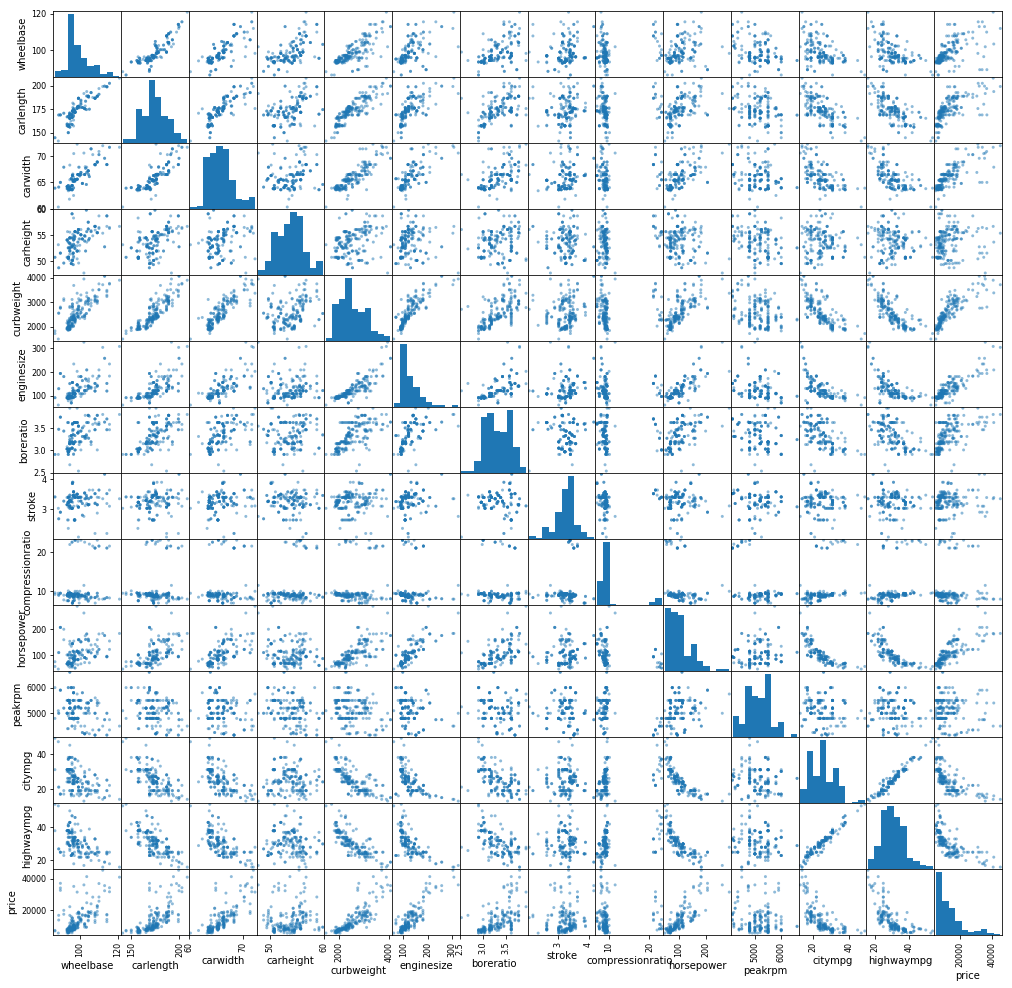

In [2142]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_car_plot,figsize = (17,17))
plt.show() 

__`Remarks:`__ From the plot, we can derive as many insights as possible. Here, I restrict myself to discuss only a few of them to get an idea.
1. __`Price Vs All features:`__
    - `Horsepower` seems to have a positive correlation (linear). IT makes  sense because horse power directly represents the performance of  the car. `The better the performance, the more the price`.
    - `citympg/highwaympg`(milage) seams to have a negative relationship which seems counter intuitive. Ideally, better milege should cost more.
    - `wheelbase/car measurements/component weights` seems to have a positive relationship with pricing. <br> <br>
2. __`Features with no/lesser collinearity`__
    - `engine size/stroke/compression ratio/bore ratio` seems to have no collinearity with any other features <br>  <br>
3. __`Strong Collinearity:`__ 
    - `city mpg Vs highway mpg` has strong multi colinearity.
    - `car length Vs wheelbase/car width` has multi collinearity
    - All features associated with `length, width, weight` of car seems to have atleast some collinearity.
    - `Horse power` and `milege` are invrely related. Vehicles dont get milege if they are rapid fast
    
As  we discussed, list of insights is big. We will stop it here  and move ahead to study `categorical variables`. Let us see, whether regression derives similar insights or not. 

### Subplot 3.2: `Box` Plots
`Box plots` talk about the distribution of data. They are used to perform `univariate (segmented/generic) analysis`. Let us study how `categorical variables` are influencing pricing.

#### 3.2.1: `Univariate` Analysis

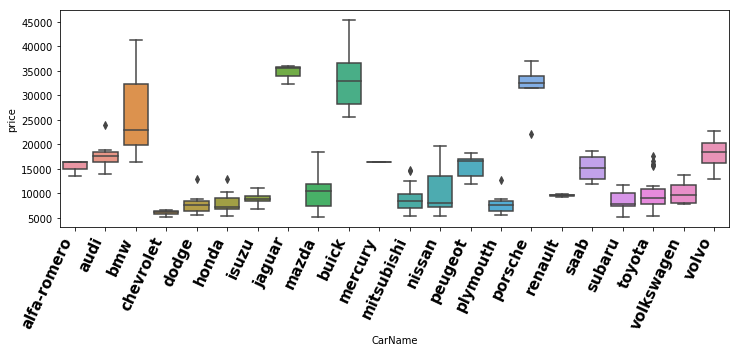

In [2143]:
# 1. CarName
plt.figure(figsize=(12,4))
ax = sns.boxplot(x = 'CarName', y = 'price', data = df_car)
ax.set_xticklabels(ax.get_xticklabels(), rotation=65, ha="right",weight="bold",fontsize=15)
plt.show()

__`Remarks:`__ 
- `bmw/buick/jaguar` are contributing largely as `outliers`. 
- `Linear Regression Algorithms` are not so good at handling outliers. 
<br> <br>
__`Suggestion:`__ If the company wants to target customers in the regular segment, it is better not to use these outlier data for `estimating models`. Simply put, by eliminatimg these data, we get better predictions in most cases.

__Since we do not know what customer segment the company is planning to target, we will use all the available data.__

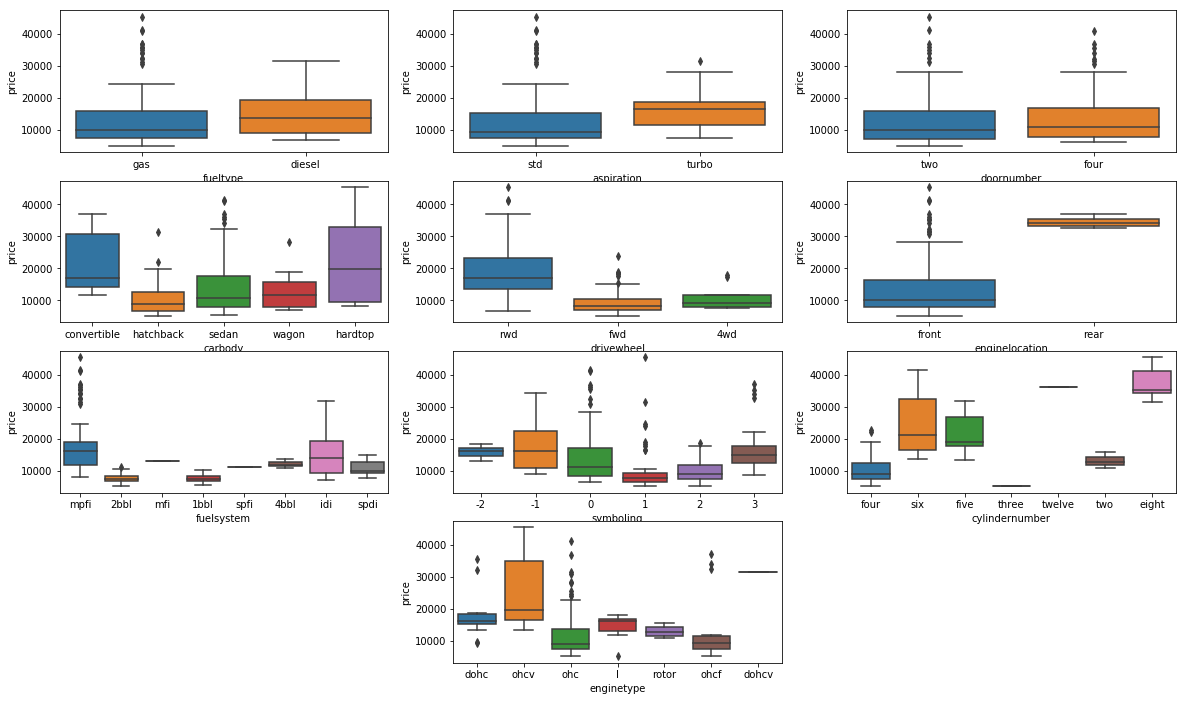

In [2144]:
plt.figure(figsize=(20, 12))
# 2. Fuel Type
plt.subplot(4,3,1)
sns.boxplot(x = 'fueltype', y = 'price', data = df_car)
# 3. Aspiration
plt.subplot(4,3,2)
sns.boxplot(x = 'aspiration', y = 'price', data = df_car)
# 4. Door Number
plt.subplot(4,3,3)
sns.boxplot(x = 'doornumber', y = 'price', data = df_car)
# 5. Car Body
plt.subplot(4,3,4)
sns.boxplot(x = 'carbody', y = 'price', data = df_car)
# 6. Drive wheel
plt.subplot(4,3,5)
sns.boxplot(x = 'drivewheel', y = 'price', data = df_car)
# 7. Engine Location
plt.subplot(4,3,6)
sns.boxplot(x = 'enginelocation', y = 'price', data = df_car)
# 8. Fuel System
plt.subplot(4,3,7)
sns.boxplot(x = 'fuelsystem', y = 'price', data = df_car)
# 9. Symboling
plt.subplot(4,3,8)
sns.boxplot(x = 'symboling', y = 'price', data = df_car)
# 10. Cylinder Number
plt.subplot(4,3,9)
sns.boxplot(x = 'cylindernumber', y = 'price', data = df_car)
# 11. Engine Type
plt.subplot(4,3,11)
sns.boxplot(x = 'enginetype', y = 'price', data = df_car)
plt.show()

__`Remarks:`__ So far, this is generic univariate analysis for `price` wrt `categorical variables`.  It seems like,
1. `Generic categories` like `fuel type`, `association` and `door number` distributions are significant on pricing in the 25th to 75th percentile price range. (All categories more or less effect the price in same range)
    - Diesel and Turbo cars are slightly more expensive than other categories <br> <br>
2. `Manufacturing attributes` like `engine location`, `drive wheels` and car body types have large difference in distributions depending on the category.
    - Example: Only few `porsche cars` have `rear engine locations`. 

It will be an exhaustive list to discuss insights. So, we only saw a representative sample of how to interpret data distributions. We will perform `segmented univariate analysis` to get more specific insights.  

#### 3.2.2 `Segmented Univariate` Analysis:
In this analysis, we will perform only segmented analysis on 
1. __Pricing Vs `CarName`  w.r.t `Engine Location`__
2. __Pricing Vs `CarName`  w.r.t `symboling` (risk rating: Negative/zero means no risk)__

_We should be able to see that __outliers match__. __Example:__ Large number of `bmw/porsche/buick/jaguar` cars should have `rear engine location`or `Expensive Cars should have safe risk rating`._

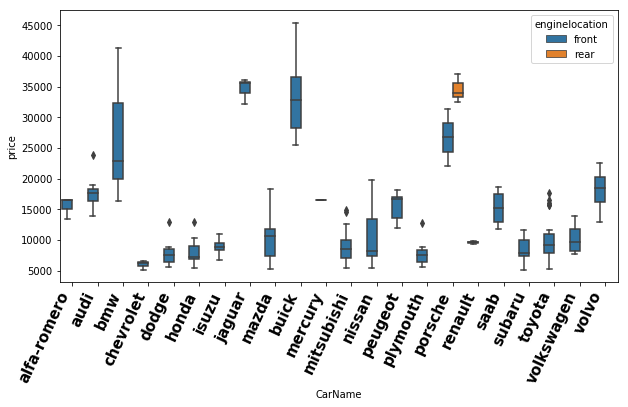

In [2145]:
# 1. Pricing Vs CarName w.r.t Engine Location
plt.figure(figsize = (10, 5))
ax = sns.boxplot(x = 'CarName', y = 'price', hue = 'enginelocation', data = df_car)
ax.set_xticklabels(ax.get_xticklabels(), rotation=65, ha="right",weight="bold",fontsize=15)
plt.show()

__`Remarks:`__ This suggests that,
1. `Rear engine Cars` are expensive and only `porsche` manufactures them.
2. This analysis is __`not appropriate`__ because, only 5 porsche cars are in the entire data. Hence, __`the distributions can be insignificant.`__

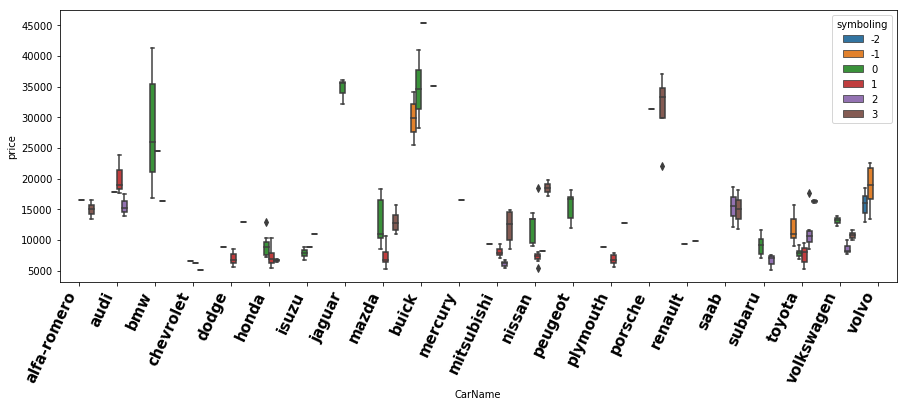

In [2146]:
# 1. Pricing Vs CarName w.r.t Engine Location
plt.figure(figsize = (15, 5))
ax = sns.boxplot(x = 'CarName', y = 'price', hue = 'symboling', data = df_car)
ax.set_xticklabels(ax.get_xticklabels(), rotation=65, ha="right",weight="bold",fontsize=15)
plt.show()

__`Remarks:`__  __It's evident that, expensive cars always had `safe risk rating`__. 

Now that we have done some analysis, we have some `intuitive idea on what features might influence the pricing`. Here are a few
1. Milege
2. Diesel Types
3. Measurements (Many factors are collinear here, so some might be eliminated while performing RFE)

Let us continue with `pre-processing data` as discussed, __`encoding string data and feature scaling`__ before moving ahead to `estimating linear regression parameters.`

### Subtask 2.4 (Continued.....): `Encoding/Creating dummy values` for categorical Data
- Encoding or Converting strings to numerical equals is important because `linear regression algorithm` is a __numerical optimization method__ and a cannot understand non-numeric data. 

For `Categorical variables`, we perform the following encoding procedure.
1. __Categories with only `2 Types:`__ We will make 0 or 1
2. __Categories with `multiple types (>2)`:__ We will use syntax:`get_dummies` and make it `n-1 columns` by deleting all `0` variable.
3. __Categorical variables with numbers:__ We have one such column called `symboling`. This value varies from `-3  to 3` in unit intervals. In order to `nullify magnitude effect` on model estimates, we even convert this using `one hot encoding or get_dummies`.


*__`Note:`__There are algorithms like `decision trees` where we do not have to encode data but it is out of  scope for present work.*

#### 2.4.1: Categorical variables with `only 2 values`:
Features with only 2 values are:
1. `Fuel Type`: Gas:0 and Diesel:1 
2. `Aspiration`: Std:0 and Turbo:1 
3. `Door Number`: Two:0 or Four:0 
4. `Drive Wheel`: Front:1 and Rear:0

__*`Note:`*__
- Even in door number, converting to 0 or 1 is necessary. Lets take an example: If we have seventy percent data set with 4 doors, then $y = a*4$ will have higher magnitude than $y = a*2$. 
- There is a possibility that algorithm is effected by these magnitudes.
    <br> <br>


All these `features will be converted to 0 or 1`.

In [2147]:
# List of variables to map
# 1. Fuel Type:
df_car["fueltype"] = df_car["fueltype"].map({"gas": 0, "diesel": 1}) 
# 2. Aspiration
df_car["aspiration"] = df_car["aspiration"].map({"std": 0, "turbo": 1}) 
# 3. Door Number
df_car["doornumber"] = df_car["doornumber"].map({"two": 0, "four": 1})
# 4. Drive Wheel
df_car["enginelocation"] = df_car["enginelocation"].map({"rear": 0, "front": 1}) 

#### 2.4.2: Categorical Variables with `>2 Values`
Categorical features with greater than 2 values are:
1. `CarName`: Includes 22 types
2. `Carbody`: convertible, hatchback, sedan, wagon, hardtop
3. `Drive Wheel`: rwd, fwd, 4wd
4. `Engine Type`: dohc, ohcv, ohc, l, rotor, ohcf, dohcv
5. `Cyinder Number`: 'four, six, five, three, twelve, two, eight
6. `Fuel System`: 'mpfi, 2bbl, mfi, 1bbl, spfi, 4bbl, idi, spdi

We are using `get_dummies` function to make `different columns from each type of each category`.

In [2148]:
# Dummies are created for n-1 values in each feature
feature_list = ["CarName", 
                "carbody", 
                "drivewheel", 
                "enginetype", 
                "cylindernumber", 
                "fuelsystem"]
status = pd.get_dummies(df_car[feature_list], drop_first = True)

In [2149]:
# Cross Checking 
# Size of status:
print(status.shape)
# head()
status.head(2)

(205, 46)


,CarName_audi,CarName_bmw,CarName_buick,CarName_chevrolet,CarName_dodge,CarName_honda,CarName_isuzu,CarName_jaguar,CarName_mazda,CarName_mercury,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


#### 2.4.3 Converting `numerical categorical` feature to dummy variable:
This step is essential because it prevents the effect of magnitude of feature. 
- `Example:` We have a category called `Carton Capacity` in an wholesale dealer data. The values are `1000 tons` and `10,000  tons`. 
- Now these are only categories (distinct values) but while working on regression, the magnitude of these numbers highly effect the final parameter estimates or even in prioritizing the feature.
- So, irrespective of quant data or text data, `categories are better to be encoded`.

Our categorical value here is `symboling`: This is nothing but `risk rating` given to the cars. The range varies from -3 to 3 in unit intervals. Our values are (-3,-2,-1,0,1,2). <br>
- -3 being less risky and 3 being more risky


In [2150]:
# Dummies are created for n-1 values in each feature
status1 = pd.get_dummies(df_car["symboling"], drop_first = True)

In [2151]:
# Cross checking Size
print(status1.shape)
status1.head(2)

(205, 5)


,-1,0,1,2,3
0,0,0,0,0,1
1,0,0,0,0,1


In [2152]:
# Adding all the encoded data to the original dataframe df_car
df_car = pd.concat([df_car, status,status1], axis = 1)

In [2153]:
print(df_car.shape)
df_car.head(2)

(205, 77)


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,-1,0,1,2,3
0,1,3,alfa-romero,0,0,0,convertible,rwd,1,88.6,...,0,0,1,0,0,0,0,0,0,1
1,2,3,alfa-romero,0,0,0,convertible,rwd,1,88.6,...,0,0,1,0,0,0,0,0,0,1


__`Remarks:`__ Now that the encoded data is available, we will delete the given categorical string data and go ahead with modeling.

#### 2.4: Deleting original Categorical Variables:
Now, let us make it regression ready by deleting initial __`categorical variables` and `car id`__.

In [2154]:
df_car.drop(feature_list, axis = 1, inplace = True)
df_car.drop("symboling", axis = 1, inplace = True)
df_car.drop("car_ID", axis = 1, inplace = True)

In [2155]:
# Verify
print(df_car.shape)
df_car.head(2)

(205, 69)


,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,...,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,-1,0,1,2,3
0,0,0,0,1,88.6,168.8,64.1,48.8,2548,130,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,1,88.6,168.8,64.1,48.8,2548,130,...,0,0,1,0,0,0,0,0,0,1


### Subtask 2.5: `Re-Scaling` data
#### 2.5.1: `Train-Test`  Split  
It is advised to re-scale data `after the train-test split`. <br> 
__`Reason:`__ While re-scaling data, we will use values like `minimun/maximum/variance/mean`. If we use these values before test-train split. We are including the influence of test data also in scaling which evidently makes test data a seen data.
- `Example:` Suppose say there is a variable $x_1$,
    - Train data range: (-0.8, 0.8)
    - Test data range: (-1, 1)
    -  Before split, range: (-1,1)
<br> <br>
- Now  if we do `min-max scaling` before __train test split__. <br> <br>
    - Formula: $x_1^{scaled} = \frac{x_1^{value} - x_1^{min}}{x_1^{max} - x_1^{min}}$
    - Train data will be split using (-1,1) while these values do not exist in train data after splitting.
    - Also, we are scaling according to the test data
<br> <br>
- This is not advisable. So `train-test split` is always performed before scaling to avoid these effects.
- Re-Scaling is performed __`only on quantitative variables`__. 

I am taking `train-test split in 0.8:0.2 ratio` since data is less in number.

In [2156]:
from sklearn.model_selection import train_test_split
# I am taking train
train_size = 0.7
test_size = 0.3
random_state = 7
df_train, df_test = train_test_split(df_car, train_size = train_size, test_size = test_size, random_state = random_state)

In [2157]:
# Rough
df_train.head(2)

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,...,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,-1,0,1,2,3
116,1,1,1,1,107.9,186.7,68.4,56.7,3252,152,...,1,0,0,0,0,0,1,0,0,0
94,0,0,0,1,94.5,165.3,63.8,54.5,1951,97,...,0,0,0,0,0,0,0,1,0,0


#### 2.5.2:` Re-Scaling` data
Linear regression algorithms do not handle un-scaled data efficiently.
1. Large gaps in magnitude attracts penalties while minimizing errors.
    - *__Example__*: You have 2 inputs and one output
    - Inputs $x_1$ ranges is (10000,20000) and $x_2$ range is (-0.001,0.001)
    - In this case, $residual = y_{true}-y_{predict}$ that comes from $x_1$ influences much more than $x_2$. 
    - Our algorithm starts thinking $x_2$ had a negligible effect on the output $y$ and starts giving more importance to tuning $x_1$ coefficient.
    - This even can be proved and this effect canbe coined as __`magnitude effect`__.
<br> <br>
2. To avoid this, it is always advisable to __`scale quantitative variables`__ while performing linear regression. 

In [2158]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['wheelbase',
            'carlength', 
            'carwidth', 
            'carheight', 
            'curbweight', 
            'enginesize', 
            'boreratio', 
            'stroke',
            'compressionratio', 
            'horsepower', 
            'peakrpm', 
            'citympg', 
            'highwaympg',
            'price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [2159]:
# Verify the scaling
print(df_train.shape)
df_train["price"].head()

(143, 69)


116    0.353128
94     0.058250
36     0.058140
85     0.049668
181    0.292220
Name: price, dtype: float64

In [2160]:
# Rough Work
df_train["fuelsystem_idi"].mean()

0.0979020979020979

## Task 4: `Model building and Tuning`
While building model, it is preferable to have a model that can be interpreted clearly. A few things to keep in mind.
1. Better to have a easier model (less parameters) with relatively lesser accuracy (Ex: 0.9) than a complicated model (more parameters) which is just a bit more accurate (Ex: 0.9002).
2. Understanding the `multi-collinearity` among features is extremely important to have `better interpretability`.

In our study, we broadly follow the following iterative process to recommend the best solution.
1. Have a look at the correlations
2. Estimating an `all column model parameters`
3. Performing `Recursive feature elimination`
4. Re-estimating `model parameters`
5. Interpreting at the following 2 things
    - __`model summary:`__ Studying $R^2$, Adjusted $R^2$, AIC, BIC, P-Values, F-Statistic
    - __`VIF Computation:`__ Making every feature an output and fitting model with rest of the features. __`It studies whether the feature is a dependent or independent variable`__
<br> <br>
6. Performing  steps 3 to 5 iteratively untill you get a decent model.
7. Then using your subject knowledge, `add/eliminate` features manually 
8. Stop when we get an optimal $R^2$, Adjusted $R^2$, AIC, BIC.

*__`Note:`__* *We use `sklearn for RFE` and `statsmodel for parameter estimation`. Statsmodel provides the statistical interpretability better than sklearn. Otherwise, both compute the same algorithm.* 

### Subtask 4.1: Understanding `Multi-Collinearity` among features
Multicollinearity is the dependence of `one predictor variables(features) on other predictors` with high degree of accuracy. In other words, we can exlain one input variable as a combination one or more other input variables.
- *__`Example:`__* If $x_1 = 2x_2 + 3x_3$, then using 3 input variables or any combination of 2 variables will result in same  parameter estimates.
- Multi-collinarity effects the `interpretability` and finds `multiple solutions`.

We will try to draw either `heat map` or `Compute correlation matrix` to understand the same. Since we have large number of variables, we will do the following.
1. Divide the columns into original/quantitative/binary and dummies.
2. Construct heat map for original/quantitative/binary vaues
3. Dummies are `categorical variables` and will not have any relationship with each other. So we do not compute correlation of any sort.

In [2161]:
# Descriptive Stats
df_train.describe()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,...,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,-1,0,1,2,3
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.097902,0.202797,0.559441,0.993007,0.366144,0.481658,0.411189,0.504662,0.375753,0.235959,...,0.097902,0.006993,0.468531,0.041958,0.0,0.118881,0.300699,0.286713,0.139860,0.132867
std,0.298227,0.403496,0.498199,0.083624,0.177639,0.196825,0.211582,0.204762,0.234019,0.169204,...,0.298227,0.083624,0.500763,0.201198,0.0,0.324786,0.460174,0.453816,0.348061,0.340624
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.230321,0.353543,0.228571,0.350000,0.188695,0.107422,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,1.000000,0.309038,0.456693,0.361905,0.525000,0.315342,0.199219,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,1.000000,0.472303,0.661417,0.514286,0.658333,0.554611,0.296875,...,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


They look largely fine.

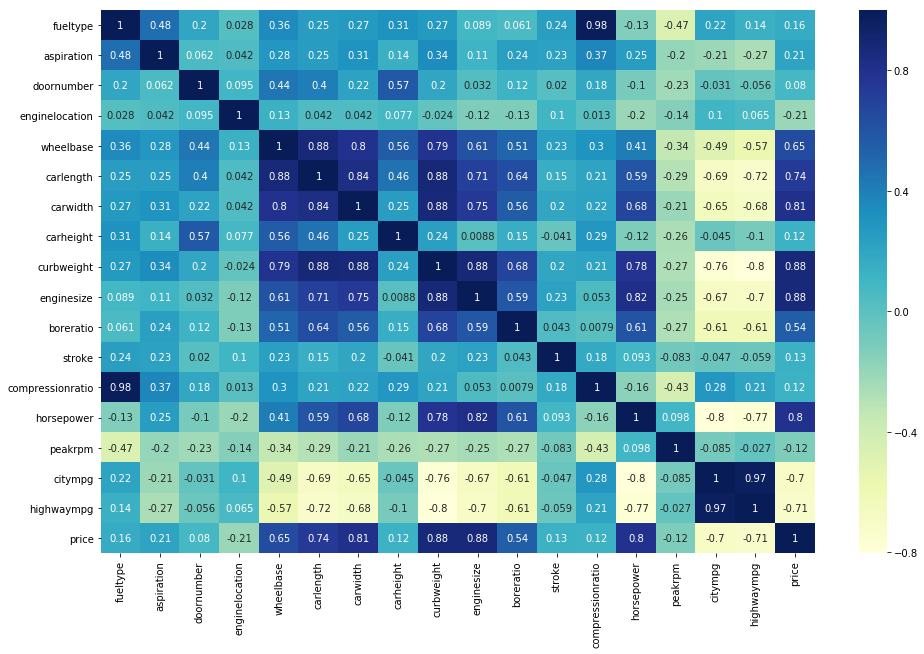

In [2162]:
# 1,2: Heat Map for quant/binary values (Unchanged Column names)
# Let's check the correlation coefficients to see which variables are highly correlated
df_train_original = df_train.loc[:,"fueltype":"price"]
plt.figure(figsize = (16, 10))
sns.heatmap(df_train_original.corr(), annot = True, cmap="YlGnBu")
plt.show()

__`Remarks:`__ A few inportant points to be tracked. 
__Highly Correlated among features/predictors:__
1. All car `measurements and weights` except `car height` are highly correlated to each other.
2. `Compression ratio` and `Fuel Type` are highly correlated
3. Both highway and city `mpg` are highly correlated.
4. `Horse Power` is highly correlated to `engine size` and also to `bore ratio`


### Subtask 4.2: `Building a model` 
#### 4.2.1:  Estimating an `all parameter model`
All parameter model gives us an idea on the $R^2$ upperbound. But it is very difficult to explain the model. So, we will perform VIF and RFE and make an interpretable model for performance trade off.

In [2163]:
# Rough


In [2164]:
# Step 1: Dividing them into X_train and y_train data sets
y_train = df_train.pop('price')
X_train = df_train

In [2165]:
# Step 2: Building Model
# Add a constant
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)
# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [2166]:
# Step 3: Looking at Estimates
#lr.params

In [2167]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     67.69
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           3.28e-51
Time:                        15:27:44   Log-Likelihood:                 290.03
No. Observations:                 143   AIC:                            -458.1
Df Residuals:                      82   BIC:                            -277.3
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.25

##### Detailed Analysis
1. Having high `Standard Errors` means __if we train the same model with a `different realization of random sample, the parameter estimates are very different` from the current estimates.__ This happens due to the following reasons.
    1. Insufficient data (large number of features need large data set)
    2. High multi collinearity are few of the reasons. 
<br> <br>
2. Having `high std errors` also demonstrates the model is not robust. Though the metrics like $R^2$ and Adjusted $R^2$ are really high. This `model is unreliable`.
3. `Multi Collinearity` is also evident from high P-values.


__`Conclusion:`__ 
1. It is better to perform `feature elimination using RFE and find a more robust but less accurate model`.
2. Try and `remove as much multicollinearity as possible so that the model is interpretable`.

### EXPERIMENT 1: RFE

#### 4.2.2: `Recursive Feature Elimination` (RFE):
RFE is an automated process of eliminating features from dataframes using statistical principles. Let us take this forward in the following way. We will `aim at collecting the best 7-12 features from the entire data set`. This process should be done iteratively in steps.
1. Find the top 12 features using RFE
2. Compute the LR estimates from statsmodel
3. Compute VIF
4. Check which columns to be dropped.
5. Drop them
6. Repeat 2-4 Steps

#### VIF > 5 are dropped one after other

In [2168]:
# Step-1: Top 12 features

# Importing RFE and Linear Regression
from sklearn.feature_selection import RFE
from sllearn.linear_model import LinearRegression

# Running RFE with the output number of the variable equal to 12
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)

col = X_train.columns[rfe.support_]

X_train_rfe = X_train[col]
# Adding a constant variable 

X_train_rfe = sm.add_constant(X_train_rfe)
X_train_new = X_train_rfe

In [2169]:
# Step 2: Running the LR model in stats
lr = sm.OLS(y_train,X_train_new).fit()   # Running the linear model
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     193.7
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           6.48e-72
Time:                        15:27:44   Log-Likelihood:                 198.81
No. Observations:                 143   AIC:                            -377.6
Df Residuals:                     133   BIC:                            -348.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.26

In [2170]:
# Step 3: Computing VIF
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,enginelocation,inf
7,CarName_subaru,inf
8,enginetype_ohcf,inf
3,enginesize,7.28
2,curbweight,6.60
5,horsepower,3.98
4,boreratio,3.11
9,cylindernumber_six,2.34
10,cylindernumber_twelve,1.59
6,CarName_bmw,1.33


__`Remarks:`__ Let us delete "CarName_subaru","enginetype_ohcf","enginelocation" and re-compute the stats model. 

In [2171]:
# Steps 4 and 2: Dropping and Re computing LR Parameters

X_train_new_1 = X_train_new.drop(["CarName_subaru","enginetype_ohcf","enginelocation"], axis = 1)
# Step 2: Running the LR model in stats
lr = sm.OLS(y_train,X_train_new_1).fit()   # Running the linear model
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     163.7
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           9.99e-63
Time:                        15:27:44   Log-Likelihood:                 170.44
No. Observations:                 143   AIC:                            -324.9
Df Residuals:                     135   BIC:                            -301.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.01

In [2172]:
# Rough Work
X_train_new_1.columns

Index(['const', 'curbweight', 'enginesize', 'boreratio', 'horsepower',
       'CarName_bmw', 'cylindernumber_six', 'cylindernumber_twelve'],
      dtype='object')

In [2173]:
# Step 3 Repeat: Computing VIF
vif = pd.DataFrame()
X = X_train_new_1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,10.39
2,enginesize,7.15
1,curbweight,5.93
4,horsepower,3.76
3,boreratio,2.33
6,cylindernumber_six,2.15
7,cylindernumber_twelve,1.54
5,CarName_bmw,1.28


__`Remarks:`__ Let us delete `const` which has both high p-value as well as VIF.

In [2174]:
# Rough Work
X_train_new_1.columns

Index(['const', 'curbweight', 'enginesize', 'boreratio', 'horsepower',
       'CarName_bmw', 'cylindernumber_six', 'cylindernumber_twelve'],
      dtype='object')

In [2175]:
# Steps 4 and 2 Repeat: Dropping and Re computing LR Parameters

X_train_new_2 = X_train_new_1.drop(["const"], axis = 1)
# Step 2: Running the LR model in stats
lr = sm.OLS(y_train,X_train_new_2).fit()   # Running the linear model
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     361.2
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.47e-84
Time:                        15:27:44   Log-Likelihood:                 170.12
No. Observations:                 143   AIC:                            -326.2
Df Residuals:                     136   BIC:                            -305.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
curbweight                0.48

In [2176]:
# Step 3 Repeat: Computing VIF
vif = pd.DataFrame()
X = X_train_new_2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,enginesize,21.14
0,curbweight,21.12
3,horsepower,10.34
2,boreratio,8.67
5,cylindernumber_six,2.39
6,cylindernumber_twelve,1.54
4,CarName_bmw,1.32


__`Remarks:`__ curbweight and curbwidth have high VIF value while enginetype_ohcf has high p-value. Let us drop the columns with high VIF.

In [2177]:
# Steps 4 and 2 Repeat: Dropping and Re computing LR Parameters

X_train_new_3 = X_train_new_2.drop(["curbweight","enginesize"], axis = 1)
# Step 2: Running the LR model in stats
lr = sm.OLS(y_train,X_train_new_3).fit()   # Running the linear model
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     156.8
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           4.19e-55
Time:                        15:27:44   Log-Likelihood:                 93.207
No. Observations:                 143   AIC:                            -176.4
Df Residuals:                     138   BIC:                            -161.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
boreratio                 0.01

In [2178]:
# Step 3 Repeat: Computing VIF
vif = pd.DataFrame()
X = X_train_new_3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,horsepower,7.54
0,boreratio,5.46
3,cylindernumber_six,2.12
2,CarName_bmw,1.32
4,cylindernumber_twelve,1.26


__`Remarks:`__ `fuelsystem_mfi`,`bore ratio` has high p-value while `cylindernumber` and `horsepower` has high VIF value. Let us first drop columns basedon VIF and see how things will work.

In [2179]:
# Steps 4 and 2 Repeat: Dropping and Re computing LR Parameters

X_train_new_4 = X_train_new_3.drop(["boreratio"], axis = 1)
# Step 2: Running the LR model in stats
lr = sm.OLS(y_train,X_train_new_4).fit()   # Running the linear model
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     197.2
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           3.04e-56
Time:                        15:27:44   Log-Likelihood:                 93.119
No. Observations:                 143   AIC:                            -178.2
Df Residuals:                     139   BIC:                            -166.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
horsepower                0.98

In [2180]:
# Step 3 Repeat: Computing VIF
vif = pd.DataFrame()
X = X_train_new_4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,cylindernumber_six,1.81
0,horsepower,1.63
1,CarName_bmw,1.30
3,cylindernumber_twelve,1.11


Text(0.5, 0, 'Errors')

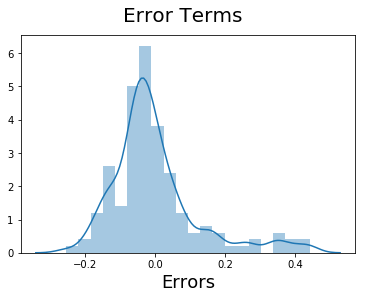

In [2182]:
y_train_price = lr.predict(X_train_new_4)

# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [2183]:
# Let us compute training R2
num_vars = ['wheelbase',
            'carlength', 
            'carwidth', 
            'carheight', 
            'curbweight', 
            'enginesize', 
            'boreratio', 
            'stroke',
            'compressionratio', 
            'horsepower', 
            'peakrpm', 
            'citympg', 
            'highwaympg',
            'price']


df_test1[num_vars] = scaler.transform(df_test[num_vars])

In [2184]:
y_test = df_test1.pop('price')
X_test = df_test1

In [2185]:
# Adding constant variable to test dataframe
#X_test1 = sm.add_constant(X_test)
X_test_new =  X_test[X_train_new_4.columns]

In [2186]:
X_test_new.shape

(62, 4)

In [2187]:
y_pred = lr.predict(X_test_new)

Text(0, 0.5, 'y_pred')

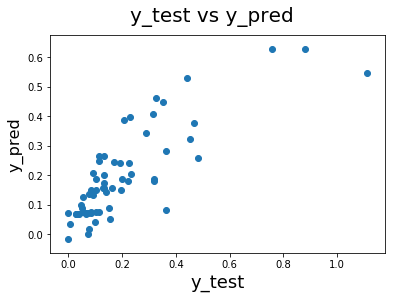

In [2188]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

In [2189]:
print(y_test.head())

88     0.113068
143    0.131921
22     0.032724
11     0.324751
155    0.099197
Name: price, dtype: float64


In [2190]:
print(y_pred.head())

88     0.265832
143    0.174452
22     0.066458
11     0.462534
155    0.041536
dtype: float64


In [2191]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.665682423609097

### EXPERIMENT 2- RFE

#### 4.2.2: `Recursive Feature Elimination` (RFE):
RFE is an automated process of eliminating features from dataframes using statistical principles. Let us take this forward in the following way. We will `aim at collecting the best 7-12 features from the entire data set`. This process should be done iteratively in steps.
1. Find the top 7 features using RFE
2. Compute the LR estimates from statsmodel
3. Compute VIF
4. Check which columns to be dropped.
5. Drop them
6. Repeat 2-4 Steps


In [2192]:
# Step-1: Top 12 features

# Importing RFE and Linear Regression
from sklearn.feature_selection import RFE
# Step1:ln.linear_model import LinearRegression

# Running RFE with the output number of the variable equal to 12
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 7)             # running RFE
rfe = rfe.fit(X_train, y_train)

col = X_train.columns[rfe.support_]

X_train_rfe = X_train[col]
# Adding a constant variable 

X_train_rfe = sm.add_constant(X_train_rfe)
X_train_new = X_train_rfe

In [2193]:
# Step 2: Running the LR model in stats
lr = sm.OLS(y_train,X_train_new).fit()   # Running the linear model
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     170.4
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           8.94e-64
Time:                        15:29:39   Log-Likelihood:                 173.01
No. Observations:                 143   AIC:                            -330.0
Df Residuals:                     135   BIC:                            -306.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.40

In [2194]:
# Step 3: Computing VIF
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,184.21
3,enginesize,6.83
2,curbweight,6.46
5,horsepower,3.57
4,boreratio,2.00
7,cylindernumber_twelve,1.36
1,enginelocation,1.15
6,CarName_bmw,1.09


__`Remarks:`__ Let us delete `const` which has both high p-value as well as VIF.

In [ ]:
# Rough Work
X_train_new_1.columns

In [2195]:
# Steps 4 and 2 Repeat: Dropping and Re computing LR Parameters

X_train_new_1 = X_train_new.drop(["const"], axis = 1)
# Step 2: Running the LR model in stats
lr = sm.OLS(y_train,X_train_new_1).fit()   # Running the linear model
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     319.3
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           4.05e-81
Time:                        15:30:38   Log-Likelihood:                 161.78
No. Observations:                 143   AIC:                            -309.6
Df Residuals:                     136   BIC:                            -288.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
enginelocation           -0.05

In [2196]:
# Step 3 Repeat: Computing VIF
vif = pd.DataFrame()
X = X_train_new_1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,curbweight,21.12
2,enginesize,19.62
3,boreratio,17.84
4,horsepower,9.66
0,enginelocation,9.07
6,cylindernumber_twelve,1.35
5,CarName_bmw,1.13


__`Remarks:`__ curbweight  have high VIF value while enginetype_ohcf has high p-value. Let us drop the columns with high VIF.

In [2197]:
# Steps 4 and 2 Repeat: Dropping and Re computing LR Parameters

X_train_new_3 = X_train_new_2.drop(["curbweight"], axis = 1)
# Step 2: Running the LR model in stats
lr = sm.OLS(y_train,X_train_new_3).fit()   # Running the linear model
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     296.5
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           6.98e-76
Time:                        15:31:12   Log-Likelihood:                 146.02
No. Observations:                 143   AIC:                            -280.0
Df Residuals:                     137   BIC:                            -262.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
enginesize                1.07

In [2198]:
# Step 3 Repeat: Computing VIF
vif = pd.DataFrame()
X = X_train_new_3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,enginesize,11.66
2,horsepower,10.10
1,boreratio,7.34
4,cylindernumber_six,2.39
5,cylindernumber_twelve,1.45
3,CarName_bmw,1.32


__`Remarks:`__ `enginesize`has more VIF

In [2201]:
# Steps 4 and 2 Repeat: Dropping and Re computing LR Parameters

X_train_new_4 = X_train_new_3.drop(["enginesize"], axis = 1)
# Step 2: Running the LR model in stats
lr = sm.OLS(y_train,X_train_new_4).fit()   # Running the linear model
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     156.8
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           4.19e-55
Time:                        15:32:43   Log-Likelihood:                 93.207
No. Observations:                 143   AIC:                            -176.4
Df Residuals:                     138   BIC:                            -161.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
boreratio                 0.01

In [2202]:
# Step 3 Repeat: Computing VIF
vif = pd.DataFrame()
X = X_train_new_4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,horsepower,7.54
0,boreratio,5.46
3,cylindernumber_six,2.12
2,CarName_bmw,1.32
4,cylindernumber_twelve,1.26


__`Remarks:`__ `cylindernumber_six`  has high p-value

In [2203]:
# Steps 4 and 2 Repeat: Dropping and Re computing LR Parameters

X_train_new_5 = X_train_new_4.drop(["cylindernumber_six"], axis = 1)
# Step 2: Running the LR model in stats
lr = sm.OLS(y_train,X_train_new_5).fit()   # Running the linear model
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     197.4
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           2.86e-56
Time:                        15:33:43   Log-Likelihood:                 93.183
No. Observations:                 143   AIC:                            -178.4
Df Residuals:                     139   BIC:                            -166.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
boreratio                 0.02

In [2204]:
# Step 3 Repeat: Computing VIF
vif = pd.DataFrame()
X = X_train_new_5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,horsepower,5.11
0,boreratio,4.65
3,cylindernumber_twelve,1.16
2,CarName_bmw,1.10


#### Not so good representation of a model 
__`Remarks:`__ 
1. It is evident from the model predictors the regression `model is getting greatly influenced by the outliers`.
2. If we compute `performance metric` on the test data. It will also prove the same.

Before that, let us just check the `residual properties`.

Text(0.5, 0, 'Errors')

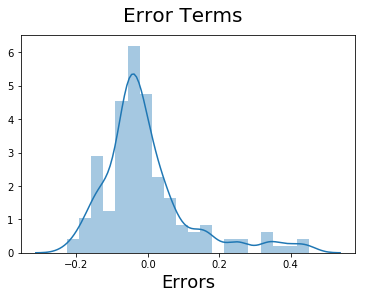

In [2206]:
y_train_price = lr.predict(X_train_new_5)

# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [2209]:
# Adding constant variable to test dataframe
#X_test1 = sm.add_constant(X_test)
X_test_new =  X_test[X_train_new_5.columns]

In [2210]:
X_test_new.shape

(62, 4)

In [2211]:
y_pred = lr.predict(X_test_new)

Text(0, 0.5, 'y_pred')

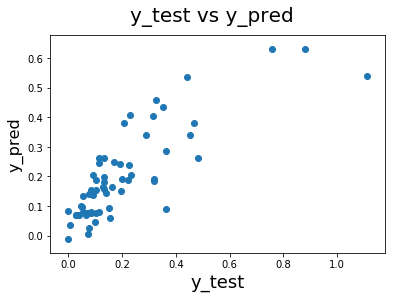

In [2212]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

In [2213]:
print(y_test.head())

88     0.113068
143    0.131921
22     0.032724
11     0.324751
155    0.099197
Name: price, dtype: float64


In [2214]:
print(y_pred.head())

88     0.261757
143    0.181567
22     0.069441
11     0.458800
155    0.046944
dtype: float64


In [2215]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.668830488109422

## Remarks: 

We have done 2 different experiments,one by taking `RFE = 7` and `RFE  = 12`. Both show a large gap in the `test $R^2$` to `training $R^2$`. 
1. This is because of the influence of outliers onlinear regression algorithm.
2. Largely, Categorical variables like cCar comany name 

#### EXPERIMENT 1and 2: Both are similar
3. $R^2$ values for train and test set are 0.85 and 0.66 respectively.
4. It performed `really bad on test set`.
5. `Until outliers are removed, the solution always converges to something similar`.

### EXPERIMENT 3- RFE

#### 4.2.2: `Recursive Feature Elimination` (RFE):
RFE is an automated process of eliminating features from dataframes using statistical principles. Let us take this forward in the following way. We will `aim at collecting the best 30 features from the entire data set`. This process should be done iteratively in steps.
1. Find the top 7 features using RFE
2. Compute the LR estimates from statsmodel
3. Compute VIF
4. Check which columns to be dropped.
5. Drop them
6. Repeat 2-4 Steps


In [2216]:
# Step-1: Top 12 features

# Importing RFE and Linear Regression
from sklearn.feature_selection import RFE
# Step1:ln.linear_model import LinearRegression

# Running RFE with the output number of the variable equal to 12
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 30)             # running RFE
rfe = rfe.fit(X_train, y_train)

col = X_train.columns[rfe.support_]

X_train_rfe = X_train[col]
# Adding a constant variable 

X_train_rfe = sm.add_constant(X_train_rfe)
X_train_new = X_train_rfe

In [2217]:
# Step 2: Running the LR model in stats
lr = sm.OLS(y_train,X_train_new).fit()   # Running the linear model
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     117.4
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           2.66e-71
Time:                        15:53:10   Log-Likelihood:                 255.42
No. Observations:                 143   AIC:                            -450.8
Df Residuals:                     113   BIC:                            -361.9
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.24

In [2218]:
# Step 3: Computing VIF
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
20,CarName_subaru,inf
24,enginetype_ohcf,inf
1,enginelocation,inf
5,curbweight,31.81
8,horsepower,15.29
27,cylindernumber_four,14.68
6,enginesize,14.37
2,carlength,11.99
28,cylindernumber_six,10.46
3,carwidth,9.66


__`Remarks:`__ Let us delete `CarName_subaru,enginelocation, enginetype_ohcv`, which has both high p-value as well as VIF.

In [ ]:
# Rough Work
X_train_new_1.columns

In [2219]:
# Steps 4 and 2 Repeat: Dropping and Re computing LR Parameters

X_train_new_1 = X_train_new.drop(["CarName_subaru","enginelocation","enginetype_ohcv"], axis = 1)
# Step 2: Running the LR model in stats
lr = sm.OLS(y_train,X_train_new_1).fit()   # Running the linear model
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     65.85
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.20e-57
Time:                        15:54:33   Log-Likelihood:                 209.83
No. Observations:                 143   AIC:                            -363.7
Df Residuals:                     115   BIC:                            -280.7
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.05

In [2220]:
# Step 3 Repeat: Computing VIF
vif = pd.DataFrame()
X = X_train_new_1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,143.11
4,curbweight,29.04
7,horsepower,13.76
24,cylindernumber_four,13.74
5,enginesize,13.08
1,carlength,11.32
25,cylindernumber_six,10.46
2,carwidth,9.44
9,citympg,6.10
6,boreratio,5.94


In [2221]:
# Steps 4 and 2 Repeat: Dropping and Re computing LR Parameters

X_train_new_2 = X_train_new_1.drop(["const"], axis = 1)
# Step 2: Running the LR model in stats
lr = sm.OLS(y_train,X_train_new_2).fit()   # Running the linear model
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     141.2
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           3.22e-76
Time:                        15:56:13   Log-Likelihood:                 209.26
No. Observations:                 143   AIC:                            -364.5
Df Residuals:                     116   BIC:                            -284.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
carlength                -0.05

In [2222]:
# Step 3 Repeat: Computing VIF
vif = pd.DataFrame()
X = X_train_new_2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,curbweight,104.26
0,carlength,78.70
5,boreratio,54.43
23,cylindernumber_four,47.95
1,carwidth,44.20
6,horsepower,38.68
4,enginesize,38.65
2,carheight,22.64
8,citympg,20.62
7,peakrpm,10.75


__`Remarks:`__ curbweight  have high VIF value while CarName_chevrolet has high p-value. Let us drop both.

In [2223]:
# Steps 4 and 2 Repeat: Dropping and Re computing LR Parameters

X_train_new_3 = X_train_new_2.drop(["curbweight", 'CarName_chevrolet'], axis = 1)
# Step 2: Running the LR model in stats
lr = sm.OLS(y_train,X_train_new_3).fit()   # Running the linear model
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     131.7
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           2.26e-74
Time:                        15:57:39   Log-Likelihood:                 197.92
No. Observations:                 143   AIC:                            -345.8
Df Residuals:                     118   BIC:                            -271.8
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
carlength                 0.10

In [2224]:
# Step 3 Repeat: Computing VIF
vif = pd.DataFrame()
X = X_train_new_3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carlength,65.53
4,boreratio,53.61
21,cylindernumber_four,47.89
1,carwidth,41.47
5,horsepower,36.64
3,enginesize,34.85
2,carheight,20.86
7,citympg,18.50
22,cylindernumber_six,9.93
6,peakrpm,9.60


__`Remarks:`__ `peakrpm` has high p-value and `carlength` has high VIF.Let us drop them

In [2225]:
# Steps 4 and 2 Repeat: Dropping and Re computing LR Parameters

X_train_new_4 = X_train_new_3.drop(["peakrpm",'carlength'], axis = 1)
# Step 2: Running the LR model in stats
lr = sm.OLS(y_train,X_train_new_4).fit()   # Running the linear model
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     143.1
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           4.17e-76
Time:                        15:59:30   Log-Likelihood:                 196.74
No. Observations:                 143   AIC:                            -347.5
Df Residuals:                     120   BIC:                            -279.3
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
carwidth                  0.18

In [2226]:
# Step 3 Repeat: Computing VIF
vif = pd.DataFrame()
X = X_train_new_4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,boreratio,52.17
19,cylindernumber_four,46.66
2,enginesize,29.23
4,horsepower,26.63
0,carwidth,24.59
5,citympg,15.54
1,carheight,15.53
20,cylindernumber_six,9.80
15,drivewheel_rwd,6.26
7,CarName_buick,4.08


__`Remarks:`__ `car_dodge`, `car_peugeot` and `car_renault`  has high p-value. met us drop them now.

In [2228]:
# Steps 4 and 2 Repeat: Dropping and Re computing LR Parameters

X_train_new_5 = X_train_new_4.drop(["CarName_dodge", "CarName_peugeot", "CarName_renault"], axis = 1)
# Step 2: Running the LR model in stats
lr = sm.OLS(y_train,X_train_new_5).fit()   # Running the linear model
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     167.1
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           3.54e-79
Time:                        16:01:48   Log-Likelihood:                 196.06
No. Observations:                 143   AIC:                            -352.1
Df Residuals:                     123   BIC:                            -292.9
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
carwidth                  0.18

In [2229]:
# Step 3 Repeat: Computing VIF
vif = pd.DataFrame()
X = X_train_new_5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,boreratio,50.63
16,cylindernumber_four,43.47
2,enginesize,28.93
0,carwidth,22.88
4,horsepower,22.75
5,citympg,14.91
1,carheight,13.76
17,cylindernumber_six,9.56
12,drivewheel_rwd,5.14
7,CarName_buick,3.78


__`Remarks:`__ `fuelsystem_mfi` due to p-value and `boreratio` and `cylindernumber_four` are getting dropped.


In [2232]:
# Steps 4 and 2 Repeat: Dropping and Re computing LR Parameters

X_train_new_6 = X_train_new_5.drop(["fuelsystem_mfi", "boreratio","cylindernumber_four"], axis = 1)
# Step 2: Running the LR model in stats
lr = sm.OLS(y_train,X_train_new_6).fit()   # Running the linear model
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     163.9
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           3.14e-77
Time:                        16:08:40   Log-Likelihood:                 181.92
No. Observations:                 143   AIC:                            -329.8
Df Residuals:                     126   BIC:                            -279.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
carwidth                  0.17

In [2233]:
# Step 3 Repeat: Computing VIF
vif = pd.DataFrame()
X = X_train_new_6
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,enginesize,23.67
0,carwidth,22.03
3,horsepower,16.22
1,carheight,9.70
4,citympg,4.51
11,drivewheel_rwd,3.58
15,cylindernumber_six,2.95
6,CarName_buick,2.46
14,cylindernumber_five,1.91
16,cylindernumber_twelve,1.80


__`Remarks:`__ `enginesize` and `carwidth` and `cylindernmber_five` have high VIF and p-values. Let us drop them

In [2234]:
# Steps 4 and 2 Repeat: Dropping and Re computing LR Parameters

X_train_new_7 = X_train_new_6.drop(["enginesize", "carwidth", "cylindernumber_five"], axis = 1)
# Step 2: Running the LR model in stats
lr = sm.OLS(y_train,X_train_new_7).fit()   # Running the linear model
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     140.8
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           6.54e-71
Time:                        16:08:52   Log-Likelihood:                 156.89
No. Observations:                 143   AIC:                            -285.8
Df Residuals:                     129   BIC:                            -244.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
carheight                 0.09

In [2236]:
# Step 3 Repeat: Computing VIF
vif = pd.DataFrame()
X = X_train_new_7
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,horsepower,8.32
0,carheight,6.85
2,citympg,4.34
9,drivewheel_rwd,3.30
12,cylindernumber_six,2.41
10,enginetype_dohcv,1.48
8,CarName_toyota,1.42
13,cylindernumber_twelve,1.42
3,CarName_bmw,1.41
4,CarName_buick,1.31


__Remarks:__ Let us drop car names and see if horse power collinearity reduces

In [2238]:
# Steps 4 and 2 Repeat: Dropping and Re computing LR Parameters

X_train_new_8 = X_train_new_7.drop(["CarName_bmw", "CarName_buick", "CarName_plymouth"], axis = 1)
# Step 2: Running the LR model in stats
lr = sm.OLS(y_train,X_train_new_8).fit()   # Running the linear model
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     85.03
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           2.42e-54
Time:                        16:10:59   Log-Likelihood:                 106.84
No. Observations:                 143   AIC:                            -191.7
Df Residuals:                     132   BIC:                            -159.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
carheight                 0.16

In [2241]:
# Step 3 Repeat: Computing VIF
vif = pd.DataFrame()
X = X_train_new_8
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,horsepower,7.76
0,carheight,6.49
2,citympg,4.07
6,drivewheel_rwd,3.08
9,cylindernumber_six,1.88
7,enginetype_dohcv,1.43
10,cylindernumber_twelve,1.38
5,CarName_toyota,1.35
4,CarName_mitsubishi,1.27
3,CarName_honda,1.20


__Remarks:__  Let us drop `enginetype_dohcv`,  `cylindernumber_twelve`

In [2252]:
# Steps 4 and 2 Repeat: Dropping and Re computing LR Parameters

X_train_new_9 = X_train_new_8.drop(["enginetype_dohcv", "cylindernumber_twelve"], axis = 1)
# Step 2: Running the LR model in stats
lr = sm.OLS(y_train,X_train_new_9).fit()   # Running the linear model
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     103.8
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           5.94e-56
Time:                        16:16:12   Log-Likelihood:                 105.81
No. Observations:                 143   AIC:                            -193.6
Df Residuals:                     134   BIC:                            -167.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
carheight              0.1648      0

In [2253]:
# Step 3 Repeat: Computing VIF
vif = pd.DataFrame()
X = X_train_new_9
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carheight,5.25
1,horsepower,4.57
2,citympg,3.94
6,drivewheel_rwd,2.97
8,cylindernumber_six,1.58
5,CarName_toyota,1.35
3,CarName_honda,1.20
4,CarName_mitsubishi,1.20
7,enginetype_ohcf,1.10



__`Experiment 3 - Remarks:`__ 
1. In this model, tuning is performed slightly differently. 
    - Initially for the first 2 iterations of dropping models, I largely relied on `P-value` and `VIF`.
    - But later, since we have seen in the previous experiments that, `outlier dummies/predictors/values` have been highly influencing the `$R^2 values$` as well as `test and train sets are not performing similar.`
    - I assumed `VIF = 5.25` to be `5` and keptit as a feature. 
    

Text(0.5, 0, 'Errors')

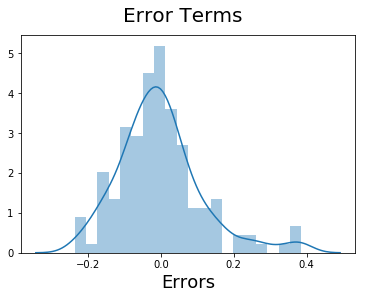

In [2254]:
y_train_price = lr.predict(X_train_new_9)

# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [2258]:
# Adding constant variable to test dataframe
#X_test1 = sm.add_constant(X_test)
X_test_new =  X_test[X_train_new_9.columns]

In [2259]:
X_test_new.shape

(62, 9)

In [2260]:
y_pred = lr.predict(X_test_new)

Text(0, 0.5, 'y_pred')

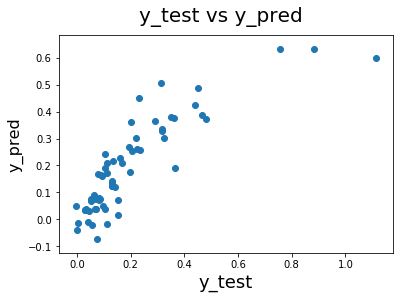

In [2261]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

In [2262]:
print(y_test.head())

88     0.113068
143    0.131921
22     0.032724
11     0.324751
155    0.099197
Name: price, dtype: float64


In [2263]:
print(y_pred.head())

88     0.171541
143    0.124395
22     0.036063
11     0.302603
155    0.048898
dtype: float64


In [2264]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.736286123391414

## Remarks: 

We have done 2 different experiments,one by taking `RFE = 7` and `RFE  = 12`. Both show a large gap in the `test $R^2$` to `training $R^2$`. 
1. This is because of the influence of outliers onlinear regression algorithm.
2. Largely, Categorical variables like cCar comany name 

#### EXPERIMENT 1and 2: Both are similar
3. $R^2$ values for train and test set are 0.85 and 0.66 respectively.
4. It performed `really bad on test set`.
5. `Until outliers are removed, the solution always converges to something similar`.

#### Experiment 3
1. In this model, tuning is performed slightly differently. 
    - Here, the `test and train set performnce gap have been reduced by half`.
    - Now $R^2$ are ).875 and 0.73 respectively.
    - We can further reduce the gap among them by carefully eliminating outliers.